In [1]:
#importing necessary libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import time

In [2]:
#read_csv files
xdf=pd.read_csv("linearX.csv")
ydf=pd.read_csv("linearY.csv")

#converting data into numpy array
x=np.array(xdf) 
y=np.array(ydf)


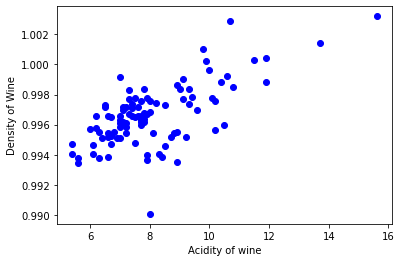

In [3]:
#plotting data points
plt.scatter(xdf,ydf,color='blue')
plt.xlabel("Acidity of wine")
plt.ylabel("Density of Wine")
plt.show()

In [4]:
#splitting the data into train and test set
from sklearn.model_selection import train_test_split
X,x_test,y,y_test=train_test_split(xdf,ydf,test_size=0.2)
y_train=y

In [5]:
xmean=np.mean(X) #mean of x
xvar=np.var(X)  #variance of x
x=(X-xmean)/xvar #normalizing x
ones=np.ones([x.shape[0],1]) 
x=np.concatenate([ones,x],1) #concatenating ones column to x(i.e x0=1)

In [6]:
def Gradient_Descent(x,y,theta,lr,max_iter,gamma):
    m=len(y) # number of samples
    theta_history=[] #to store all the values of theta
    cnt=0 #count
    j_old=0 #old cost
    e=np.dot(x,theta)-y
    j_cur=np.sum(e**2)/(2*m) #current cost value
    costs=[]  #to store all the values of cost
    costs.append(j_cur)
    theta_history.append(theta)
    cnt+=1
    
    while abs(j_cur-j_old)>gamma: #convergence condition as a function of change in value of theta
        j_old=j_cur
        
        grad=x.T.dot(e)/m #gradient (delta theta jtheta)
        theta=theta-lr*grad 
        
        theta_history.append(theta) #storing all the theta values
        e=np.dot(x,theta)-y #error
        j_cur=np.sum(e**2)/(2*m) #cost
        costs.append(j_cur) #storing all the cost values
        cnt+=1
        if cnt==max_iter:
            break
    
    print("Cost:",j_cur)
    print("theta param:",theta)
    
    return theta_history,costs,cnt 

In [7]:
max_iter=2000 #maximum iteration
lr=0.1 #learning rate
gamma=0.000000000001 #gamma value to check convergence(i.e as a function of change in value of cost function j(theta))
y = np.array(y).flatten()
theta=([0,0]) #initializing theta to a zero vector
theta_hist,costs,num=Gradient_Descent(x,y,theta,lr,max_iter,gamma) #function calling

Cost: 8.83929039420965e-07
theta param: [0.99670818 0.00234239]


In [8]:
theta_hist

[[0, 0],
 array([9.96708228e-02, 8.05193418e-05]),
 array([1.89374563e-01, 1.58281335e-04]),
 array([2.70107930e-01, 2.33380405e-04]),
 array([3.4276796e-01, 3.0590774e-04]),
 array([4.08161986e-01, 3.75951411e-04]),
 array([4.67016611e-01, 4.43596467e-04]),
 array([5.19985772e-01, 5.08925049e-04]),
 array([0.56765802, 0.00057202]),
 array([0.61056304, 0.00063295]),
 array([0.64917756, 0.00069179]),
 array([0.68393062, 0.00074862]),
 array([0.71520839, 0.0008035 ]),
 array([0.74335837, 0.00085651]),
 array([0.76869336, 0.0009077 ]),
 array([0.79149484, 0.00095713]),
 array([0.81201618, 0.00100487]),
 array([0.83048539, 0.00105098]),
 array([0.84710767, 0.00109551]),
 array([0.86206773, 0.00113852]),
 array([0.87553178, 0.00118005]),
 array([0.88764942, 0.00122016]),
 array([0.8985553 , 0.00125889]),
 array([0.90837059, 0.0012963 ]),
 array([0.91720436, 0.00133243]),
 array([0.92515474, 0.00136732]),
 array([0.93231009, 0.00140102]),
 array([0.93874991, 0.00143356]),
 array([0.94454574,

In [9]:
num #number of iterations for converging 

161

In [10]:
theta=theta_hist[-1] #optimum value

In [11]:
theta

array([0.99670818, 0.00234239])

In [12]:
costs[-1] #final cost

8.83929039420965e-07

In [13]:
#prediction
x_test=np.array(x_test)
xp=x_test[5]
y_pred=theta[0]+theta[1]*xp
print(y[5],y_pred)

0.9957799999999999 [1.01521306]


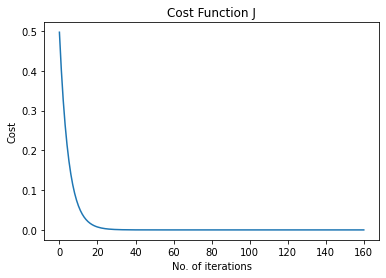

In [14]:
#plotting cost function wrt number of iterations
plt.title('Cost Function J') 
plt.xlabel('No. of iterations')
plt.ylabel('Cost')
plt.plot(costs)
plt.show()

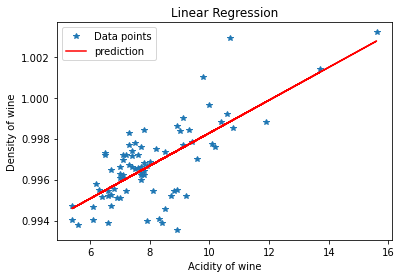

In [15]:
#plotting the regression line
plt.plot(X, y_train,'*',label='Data points', markersize=6)
plt.xlabel('Acidity of wine')
plt.ylabel('Density of wine')
plt.title('Linear Regression')
plt.plot(X,np.dot(x,theta),label='prediction',color='red')
plt.legend()
plt.show(block=False)

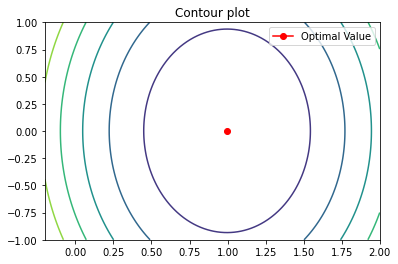

In [16]:
def error(x,y,theta):
    return np.sum((x.dot(theta)-y)**2)/(2*y.size)

x_=np.linspace(-0.2,2,100) #x axis range
y_=np.linspace(-1,1,100) #y axis range
x_,y_=np.meshgrid(x_,y_)
zs=np.array([error(x,y,theta) for theta in zip(np.ravel(x_), np.ravel(y_))]) 
zs=zs.reshape(x_.shape) 

fig = plt.figure()
CS = plt.contour(x_,y_,zs) #plotting contour
plt.plot([theta[0]], [theta[1]], color='r', marker='o', label='Optimal Value') #optimum value
plt.legend() 
plt.title('Contour plot')
plt.show()

In [17]:
%matplotlib notebook

#function for plotting contours
def contour_plot(lr,gamma):
    theta=np.array([0,0])
    theta_hist,costs,num=Gradient_Descent(x,y,theta,lr,1000,gamma) #calling the function gradient descent
    
    t0=np.array([t[0] for t in theta_hist]) # all the values of theta0 parameter
    t1=np.array([t[1] for t in theta_hist]) # all the values of theta1 parameter
    cost=np.array(costs) #numpy array of all cost value
    
    theta=theta_hist[-1] #optimum theta values
    x_=np.linspace(-0.6,2,30) #range of x axis in plot
    y_=np.linspace(-1,1,30)   #range of y axis in plot
    x_,y_=np.meshgrid(x_,y_)
    zs=np.array([error(x,y,theta) for theta in zip(np.ravel(x_), np.ravel(y_))]) #calculating z values for all theta in zip(x,y) 
    zs=zs.reshape(x_.shape)  #reshape z axis values same as x or y 
    fig=plt.figure(figsize=(5,5))
   
    plt.contour(x_,y_,zs,30)#plotting contour 
    theta=theta_hist[-1]
    #plt.plot([theta[0]],[theta[1]],color='r',marker='x') 
    plt.xlabel("theta0")
    plt.ylabel("theta1")
    plt.title("contour with "+"  "+"learning_rate:{0}".format(lr))
    print("Number of iteration took to converge: ",num)
    
    for i in range(len(t0)):
        if(i%20==0): #printing the value of cost after every 20 iteration
            print("iter:{0},cost:{1}".format(i,cost[i]))
        plt.plot(t0[i],t1[i],color='red',marker='.')
        fig.canvas.draw()
        time.sleep(0.2)

Cost: 8.83929039420965e-07
theta param: [0.99670818 0.00234239]


<IPython.core.display.Javascript object>


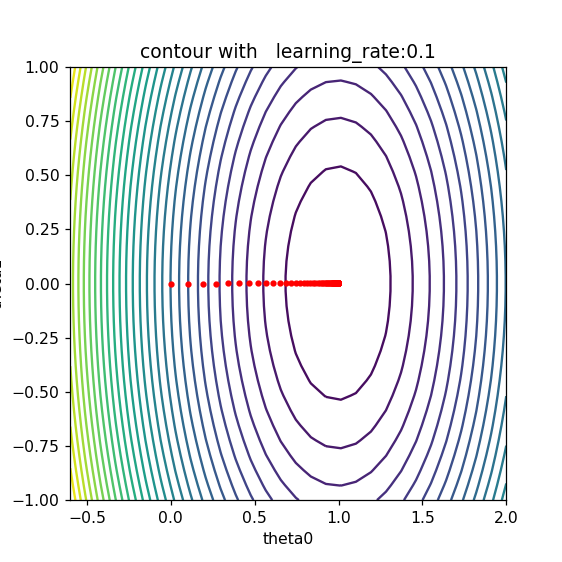

Number of iteration took to converge:  161
iter:0,cost:0.4967154762727848
iter:20,cost:0.007342985059073851
iter:40,cost:0.00010946146552480894
iter:60,cost:2.5023883632096913e-06
iter:80,cost:9.112127354704208e-07
iter:100,cost:8.851563264325513e-07
iter:120,cost:8.84141566725696e-07
iter:140,cost:8.839703366328425e-07
iter:160,cost:8.83929039420965e-07


In [18]:
#learning rate=0.1
gamma=0.000000000001
contour_plot(0.1,gamma)

Cost: 0.06729152230229156
theta param: [0.62985632 0.00068133]


<IPython.core.display.Javascript object>


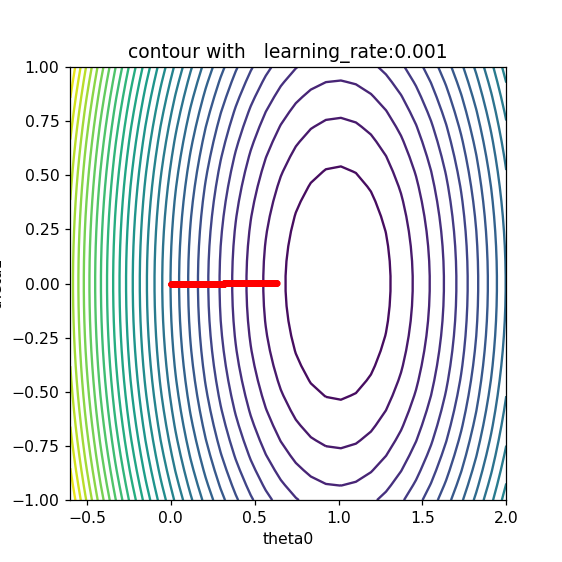

Number of iteration took to converge:  1000
iter:0,cost:0.4967154762727848
iter:20,cost:0.47722949174563273
iter:40,cost:0.4585079379550483
iter:60,cost:0.44052082644881907
iter:80,cost:0.42323934521533324
iter:100,cost:0.40663581253206166
iter:120,cost:0.3906836326245576
iter:140,cost:0.3753572530649421
iter:160,cost:0.36063212384163973
iter:180,cost:0.3464846580347981
iter:200,cost:0.33289219403440395
iter:220,cost:0.31983295924057364
iter:240,cost:0.307286035187874
iter:260,cost:0.2952313240378086
iter:280,cost:0.2836495163857961
iter:300,cost:0.27252206033107584
iter:320,cost:0.2618311317599924
iter:340,cost:0.25155960579506154
iter:360,cost:0.2416910293640835
iter:380,cost:0.232209594845364
iter:400,cost:0.2231001147468276
iter:420,cost:0.21434799737846388
iter:440,cost:0.20593922347913882
iter:460,cost:0.19786032376033127
iter:480,cost:0.19009835733082378
iter:500,cost:0.1826408909677886
iter:520,cost:0.17547597920106378
iter:540,cost:0.16859214517872043
iter:560,cost:0.161978362

In [19]:
#learning rate=0.001
gamma=0.000000000001
contour_plot(0.001,gamma)

Cost: 9.716653164000157e-07
theta param: [0.99677263 0.00243844]


<IPython.core.display.Javascript object>


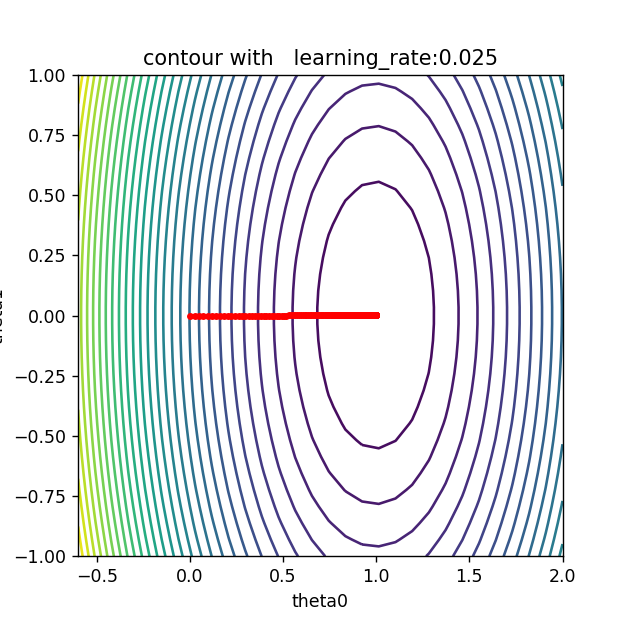

Number of iteration took to converge:  597
iter:0,cost:0.49678006802025315
iter:20,cost:0.18044760618392355
iter:40,cost:0.06554529675050585
iter:60,cost:0.023808980104065656
iter:80,cost:0.008648945085834964
iter:100,cost:0.003142291811417387
iter:120,cost:0.0011420701454433082
iter:140,cost:0.0004155055601015165
iter:160,cost:0.00015157986976682046
iter:180,cost:5.570348183076609e-05
iter:200,cost:2.087083184571732e-05
iter:220,cost:8.213256011120493e-06
iter:240,cost:3.611837338690894e-06
iter:260,cost:1.9377244691380852e-06
iter:280,cost:1.3276612846459411e-06
iter:300,cost:1.1046425414207514e-06
iter:320,cost:1.0226061302981213e-06
iter:340,cost:9.9206461260219e-07
iter:360,cost:9.80433996263609e-07
iter:380,cost:9.758214633482759e-07
iter:400,cost:9.73865792830649e-07
iter:420,cost:9.72952964602065e-07
iter:440,cost:9.724751251777915e-07
iter:460,cost:9.721958855092989e-07
iter:480,cost:9.7201811344606e-07
iter:500,cost:9.718983869116902e-07
iter:520,cost:9.718150524918088e-07
it

In [19]:
#learning rate=0.025
gamma=0.000000000001
contour_plot(0.025,gamma)

<IPython.core.display.Javascript object>


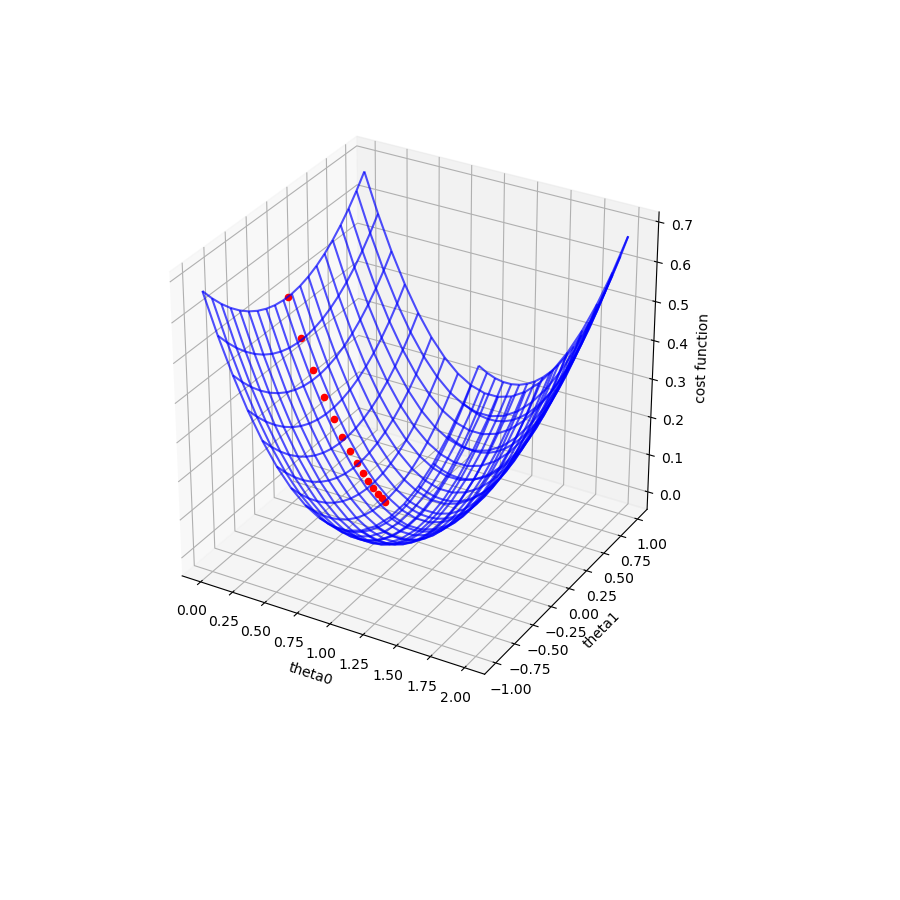

iter-0,cost-0.4967154762727848


In [ ]:
from mpl_toolkits.mplot3d import Axes3D
x_= np.linspace(0,2,20) #x range values to plot meshgrid
y_= np.linspace(-1,1,20) #y range values to plot meshgrid
x_,y_=np.meshgrid(x_,y_)

zs=np.array([error(x,y,theta) for theta in zip(np.ravel(x_), np.ravel(y_))]) #z axis values(cost function),ravel func flattens the array 
zs=zs.reshape(x_.shape)  #reshape z axis values same as that of x and y 

fig = plt.figure(figsize=(8,8))
ax = fig.gca(projection='3d') #gets the current axis
ax.plot_wireframe(x_,y_,zs,rstride=1,cstride=1,color='blue',alpha=80) #plotting wireframe

ax.set_xlabel("theta0")
ax.set_ylabel("theta1")
ax.set_zlabel("cost function")

t0=np.array([t[0] for t in theta_hist]) # all the values of theta0 parameter
t1=np.array([t[1] for t in theta_hist]) # all the values of theta1 parameter
cost=np.array(costs) #numpy array of costs

for i in range(len(t0)):
    if(i % 20 == 0):  #printing cost values for every 20 iteration
        print("iter-{0},cost-{1}".format(i,cost[i]))
    ax.scatter3D(t0[i],t1[i],costs[i],color='red',marker='o')#scatter plot in 3D
    fig.canvas.draw() #to create anim
    time.sleep(0.2) #0.2 sec delay

In [20]:
%matplotlib notebook

#function for plotting contours
def contour_plot(xlim,ylim,lr,gamma):
    theta=np.array([0,0])
    theta_hist,costs,num=Gradient_Descent(x,y,theta,lr,1000,gamma)#calling the function gradient descent
    
    t0=np.array([t[0] for t in theta_hist]) # all the values of theta0 parameter
    t1=np.array([t[1] for t in theta_hist]) # all the values of theta1 parameter
    cost=np.array(costs) #numpy array of all cost value
    
    theta=theta_hist[-1] #optimum theta values
    '''x_=np.linspace(-0.6,2,30) #range of x axis in plot
    y_=np.linspace(-1,1,30)   #range of y axis in plot
    x_,y_=np.meshgrid(x_,y_)'''
    xlim = xlim if t0.min()>xlim[0] and t0.max()<xlim[1] else (t0.min(),t0.max())
    ylim = ylim if t1.min()>ylim[0] and t1.max()<ylim[1] else (t1.min(),t1.max())
    xs=np.linspace(xlim[0],xlim[1],20)
    ys=np.linspace(ylim[0],ylim[1],20)
    xs,ys=np.meshgrid(xs,ys)
    zs=np.array([error(x,y,theta) for theta in zip(np.ravel(xs), np.ravel(ys))]) #calculating z values for all theta in zip(x,y) 
    zs=zs.reshape(xs.shape)  #reshape z axis values same as x or y 
    fig=plt.figure(figsize=(5,5))
   
    plt.contour(xs,ys,zs,30)#plotting contour 
    theta=theta_hist[-1]
    plt.plot([theta[0]],[theta[1]],color='r',marker='x') 
    plt.xlabel("theta0")
    plt.ylabel("theta1")
    plt.title("contour with "+"  "+"learning_rate:{0}".format(lr))
    print("Number of iteration took to converge: ",num)
    
    for i in range(len(t0)):
        if(i%20==0): #printing the value of cost after every 20 iteration
            print("iter:{0},cost:{1}".format(i,cost[i]))
        plt.plot(t0[i],t1[i],color='red',marker='.')
        fig.canvas.draw()
        time.sleep(0.2)

Cost: 1.0263766552281978e-06
theta param: [0.99666957 0.00279836]


<IPython.core.display.Javascript object>


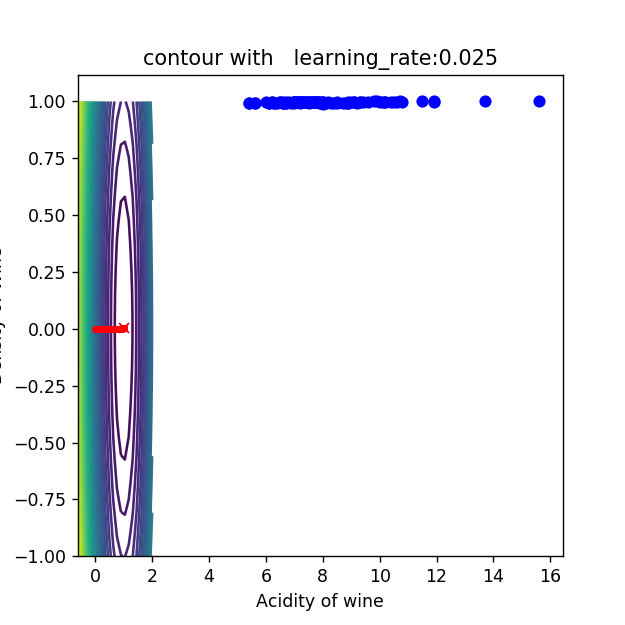

Number of iteration took to converge:  665
iter:0,cost:0.49667735793291146
iter:20,cost:0.18041042714425098
iter:40,cost:0.06553190474764117
iter:60,cost:0.02380421422601318
iter:80,cost:0.008647300400079104
iter:100,cost:0.0031417706817218265
iter:120,cost:0.0011419487255313724
iter:140,cost:0.00041552246742583115
iter:160,cost:0.0001516414771025663
iter:180,cost:5.5776881128582874e-05
iter:200,cost:2.0944976638289875e-05
iter:220,cost:8.28487229651788e-06
iter:240,cost:3.680331446347261e-06
iter:260,cost:2.0033572624640063e-06
iter:280,cost:1.3909062235966692e-06
iter:300,cost:1.1659708691739611e-06
iter:320,cost:1.0824243493578104e-06
iter:340,cost:1.0507046430919289e-06
iter:360,cost:1.0381601415406218e-06
iter:380,cost:1.0328414813451978e-06
iter:400,cost:1.0303417782281058e-06
iter:420,cost:1.0290107722631908e-06
iter:440,cost:1.0282121284101267e-06
iter:460,cost:1.0276872116093773e-06
iter:480,cost:1.0273215902606867e-06
iter:500,cost:1.0270584353461305e-06
iter:520,cost:1.02686

In [21]:
gamma=0.000000000001
contour_plot((-0.6,2),(-1,1),0.025,gamma)